# Feature Engineering
Lifecycle of a Data Science Projects
1. Data Collection 
2. Feature Engineering

Why are their Missing Values?

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

## Different Types of Missing Values??
1. **Missing Completly At Random (MCAR)**: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, **there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset**. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

2. **Missing Data Now At Random(MNAR)**: Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

3. **Missing At Random(MAR)**:  It means that the propensity for the data point to be missed is not related to the missong data but it is related to some other observed data. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

## Find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## All the techniques of handling missing values

1. **Mean/ Median/Mode replacement**
2. **Random Sample Imputation**
3. **Capturing NAN values with a new feature**
4. **End of Distribution imputation**
5. **Arbitrary imputation**
6. **Frequent categories imputation**
7. **Treat nan value of categoriacal as new category**
8. **Apply classifier a log to predit NaN values (Most efficient technique) (KNN algo)**
9. **Drop Values**

### 1) Mean/Median/Mode replacement

In [11]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
cabin_null     0.000000
dtype: float64

#### MEDIAN

In [12]:
def impute_nan(df,column,median):
    df[column+'_median']=df[column].fillna(median)

In [13]:
median = df.Age.median()
median

28.0

In [14]:
impute_nan(df,'Age',median)
df[df.Age.isna()]["Age_median"]

5      28.0
17     28.0
19     28.0
26     28.0
28     28.0
       ... 
859    28.0
863    28.0
868    28.0
878    28.0
888    28.0
Name: Age_median, Length: 177, dtype: float64

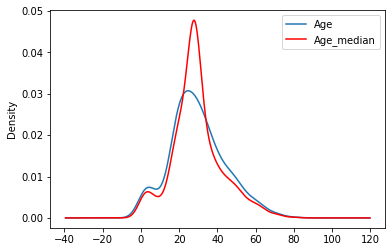

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### MEAN

In [16]:
def impute_nan(df,column,mean):
    df[column+'_mean']=df[column].fillna(mean)

In [17]:
impute_nan(df,'Age',df.Age.mean())
df[df.Age.isna()]["Age_mean"]

5      29.699118
17     29.699118
19     29.699118
26     29.699118
28     29.699118
         ...    
859    29.699118
863    29.699118
868    29.699118
878    29.699118
888    29.699118
Name: Age_mean, Length: 177, dtype: float64

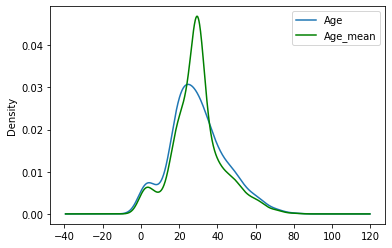

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_mean.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### MODE

In [19]:
def impute_nan(df,column,mode):
    df[column+'_mode']=df[column].fillna(mode)

In [20]:
impute_nan(df,'Age',df.Age.mode())

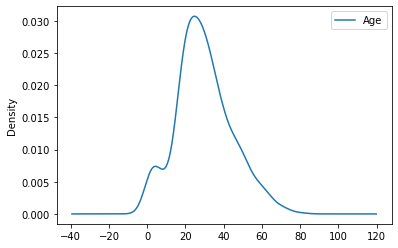

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_mode.plot(kind='kde', ax=ax, color='brown')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation
3. For categorical variable, we should apply mode.

In [22]:
import pandas as pd
df = pd.read_csv('data/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

### 2) Random Sample Imputation

In [24]:
len(df)

891

In [25]:
len(df['Age'].dropna())

714

In [26]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

870    26.0
528    39.0
556    48.0
592    47.0
450    36.0
       ... 
461    34.0
512    36.0
572    36.0
513    54.0
66     29.0
Name: Age, Length: 177, dtype: float64

In [27]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [29]:
df.loc[df["Age"].isnull(),'Age']=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)
df["Age"].isnull().sum()

177

In [30]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]

    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index #place NaN index to random_sample
    
    #replace where NaN are there
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    col=variable+"_random"
    df = df.drop(col,axis=1)
impute_nan(df,"Age")

In [31]:
df.head(8)

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0


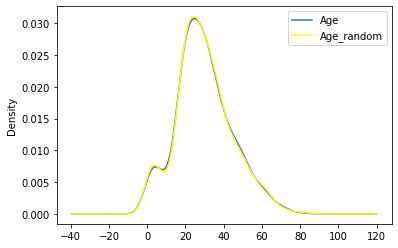

In [32]:
#plot
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

###### 2.1) Advantages
* Easy To implement
* There is less distortion in variance

###### 2.2) Disadvantage¶
* We can not apply it in every situation

### 3) Capturing NAN values with new feature

It works well if the data are not missing completely at random

In [33]:
df=pd.read_csv("data/titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
import numpy as np
df['age_nan']=np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [35]:
df['Age'].fillna(28,inplace=True)

In [36]:
df.head(8)

,Survived,Age,Fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0


#### Advantage
1. Easy to implement
2. Captures the importance of NaN values

#### Disadvantage
1. Creates Additional Featues (Curse of Dimensionality)

```when the dimensionality increases, the volume of the space increases so fast that the available data become sparse```

## 4) End of Distribution 

Missing Value is not at random then capturing that information is important

we take the values that are after 3rd std deviation

Far End

In [37]:
df=pd.read_csv("data/titanic.csv",usecols=['Age','Fare','Survived'])

In [38]:
df.head(8)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750


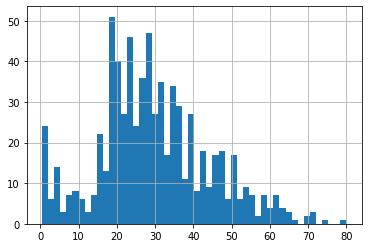

In [39]:
df.Age.hist(bins=50)

Text(0.5, 1.0, 'Before Imputing')

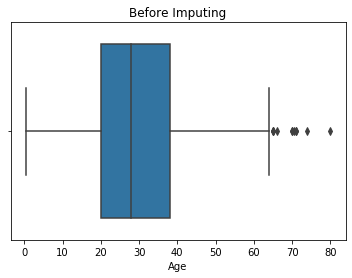

In [40]:
import seaborn as sns
sns.boxplot('Age',data=df) ### We can Find Outliers using it
plt.title("Before Imputing")

In [41]:
df.Age.mean()+3*df.Age.std() 

73.27860964406094

In [42]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [43]:
extreme=df.Age.mean()+3*df.Age.std()
print(extreme)
impute_nan(df,'Age',df.Age.median(),extreme)

df.head(8)

73.27860964406094


,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000


Text(0.5, 1.0, 'After Imputing')

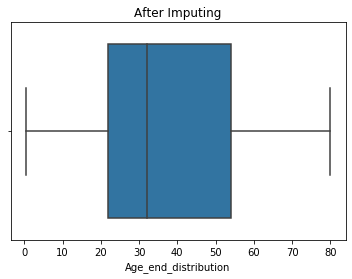

In [44]:
import seaborn as sns
sns.boxplot('Age_end_distribution',data=df) ### We can Find Outliers using it
plt.title("After Imputing")

Here We can see that there is no Missing Value

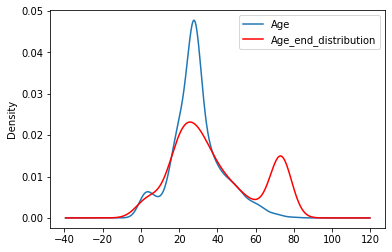

In [45]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_end_distribution'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
* Easy to implement
* Captures the importance of missingness if there is one

#### Disadvantages
* Distorts the original distribution of the variable
* if the number of NAN is big. It will mask true outliers in the distribution.
* if the number of NAN is small, then replaced NAN may be considered an outlier and pre processed in a subsequent feature engineering.


## 5) Arbitrary Value Imputation

It consists of replacing NAN by an arbitrary value

* It should not be more frequently Present
* We can take the least outlier or last outlier value as ab arbitrary value

In [46]:
import pandas as pd

df=pd.read_csv("data/titanic.csv",usecols=['Age','Fare','Survived'])

df.head(8)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750


Text(0.5, 1.0, 'Histogram of Age')

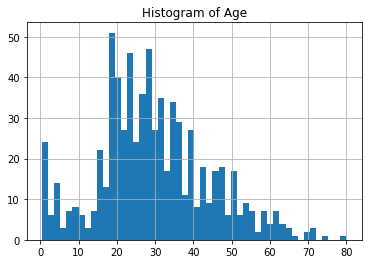

In [47]:
df["Age"].hist(bins=50)
plt.title("Histogram of Age")

In [48]:
def impute_nan(df,var):
    df[var+'_zero']=df[var].fillna(0)
    df[var+'_hundred']=df[var].fillna(100)

In [49]:
impute_nan(df,'Age')
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


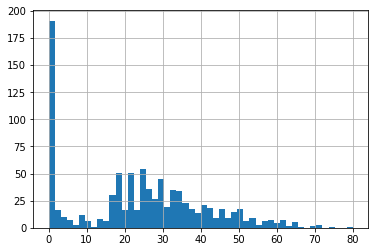

In [50]:
df.Age_zero.hist(bins=50)

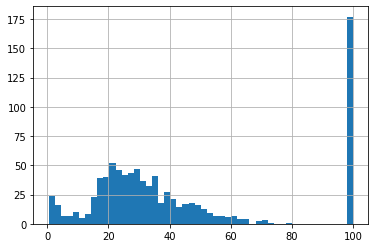

In [51]:
df.Age_hundred.hist(bins=50)

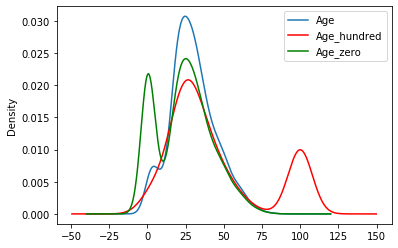

In [52]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_hundred'].plot(kind='kde', ax=ax, color='red')
df['Age_zero'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


##### Advantages
* Easy to implement
* Captures the importance of missingess if there is one

##### Disadvantages
* Hard to decide which value to use

## 6)Frequent Category Imputation

In [53]:
import pandas as pd
df=pd.read_csv("data/titanic.csv",usecols=['Cabin','Survived'])
print("Before Imputation")
df.head(8)


Before Imputation


,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
5,0,NaN
6,0,E46
7,0,NaN


In [54]:
df.isnull().mean()

Survived    0.000000
Cabin       0.771044
dtype: float64

In [55]:
df.isnull().sum()

Survived      0
Cabin       687
dtype: int64

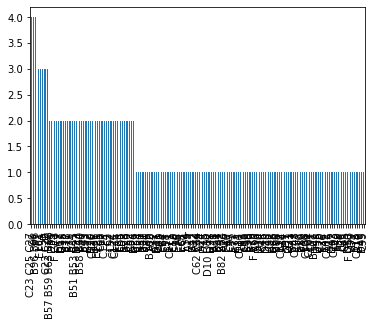

In [56]:
df['Cabin'].value_counts().plot.bar();

Text(0.5, 1.0, 'Top 15 Max Frequent to Less Frequent')

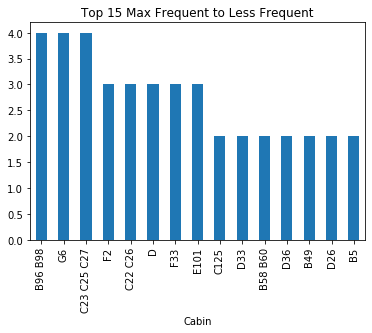

In [57]:
## Maximum to Minimum
df.groupby(['Cabin'])['Cabin'].count().sort_values(ascending=False)[:15].plot.bar()
plt.title("Top 15 Max Frequent to Less Frequent")

In [58]:
df.Cabin.mode()[0]

'B96 B98'

In [59]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [60]:
for feature in ['Cabin']:
    impute_nan(df,feature)

In [61]:
print("After Imputation")
df.head(8)

After Imputation


,Survived,Cabin
0,0,B96 B98
1,1,C85
2,1,B96 B98
3,1,C123
4,0,B96 B98
5,0,B96 B98
6,0,E46
7,0,B96 B98


In [62]:
df.isnull().mean()

Survived    0.0
Cabin       0.0
dtype: float64

##### Advantages
* Easy To implement

##### Disadvantages
* Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
* It distorts the relation of the most frequent label

## 7) Treat nan value of categoriacal as new category

In [63]:
import pandas as pd
df=pd.read_csv("data/titanic.csv",usecols=['Cabin','Survived'])

df.head(8)

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
5,0,NaN
6,0,E46
7,0,NaN


In [64]:
df['Cabin']=df['Cabin'].fillna('Missing')

In [65]:
df['Cabin'].isnull().sum()

0

In [66]:
df['Cabin']

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

## 8) Using KNN

In [67]:
import pandas as pd
df=pd.read_csv("data/titanic.csv",usecols=['Age','Survived'])
print("Before Imputation")
df.head(8)

Before Imputation


,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0


In [68]:
df.Age.isnull().sum()

177

In [69]:
##Step 1
num = [col for col in df.columns if df[col].dtypes != 'O']
num

['Survived', 'Age']

In [70]:
## Step 2
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)

In [71]:
## Step 3
knn.fit(df[num])

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [72]:
## Step 4
knn.transform(df[num])

array([[ 0. , 22. ],
       [ 1. , 38. ],
       [ 1. , 26. ],
       ...,
       [ 0. , 30.1],
       [ 1. , 26. ],
       [ 0. , 32. ]])

In [73]:
## Step 5
df2 = pd.DataFrame(knn.transform(df[num]),columns=['Survived', 'Age'])
print("After Imputation")
df2.head(8)

After Imputation


,Survived,Age
0,0.0,22.0
1,1.0,38.0
2,1.0,26.0
3,1.0,35.0
4,0.0,35.0
5,0.0,30.1
6,0.0,54.0
7,0.0,2.0


In [74]:
df2.isnull().sum()

Survived    0
Age         0
dtype: int64

##### Advantages
* Easy To implement
* Gives Best Results

## 9) Dropping Values

In [75]:
import pandas as pd
df=pd.read_csv("data/titanic.csv",usecols=['Age','Survived'])

df.head(8)

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0


In [76]:
df.isnull().sum()

Survived      0
Age         177
dtype: int64

In [77]:
df.dropna(inplace=True)

In [78]:
df.isnull().sum()

Survived    0
Age         0
dtype: int64

***********************************************************************************************************
### References

[1] https://www.youtube.com/user/krishnaik06

[2] https://github.com/krishnaik06/Feature-Engineering-Live-sessions